# Apple Tree Disease Diagnosis


# Section 1: EXPLORATORY DATA ANALYSIS
- Reading the Dataset
- Column Names of the Dataset
- Renaming Column Names of the Dataset
- Transposed Descriptive Statistics of the Dataset
- Presentation of Descriptive Statistics of the Dataset in Tabular Form
- Overview of the Dataset
- Detection of Numerical and Categorical Variables in the Dataset
- Examination of Categorical Variables
- Examination of Numerical Variables
- Target Variable Analysis
- Correlation Analysis
# Section 2: FEATURE ENGINEERING
- Outlier Analysis
- Missing Values
- Label Encoding
- Feature Scaling
# Section 3: MODEL BUILDING AND PERFORMANCE
- Splitting into Training - Validation - Test datasets
- Setting up Base Models
- Hyperparameter Optimization
- Ensemble Model Created from the Best Models
- Error Rate in the Most Successful Model
- Model Logging
- Model Invocation

## SECTİON 1
## 1.  EXPLORATORY DATA ANALYSIS

### Required Libraries

In [35]:
import numpy as np# Efficient Usage of Multidimensional Arrays and Matrices
import pandas as pd # For DataFrame Operations

import random

#######Data Visualization#########
import matplotlib.pyplot as plt
import seaborn as sns

#######The library commonly used for success metrics#########
from sklearn.metrics import mean_squared_error,accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

#The library commonly used for hyperparameter optimization
from sklearn.model_selection import GridSearchCV, cross_validate

#The library commonly used for splitting the dataset into training set
from sklearn.model_selection import train_test_split

#Label Encoding Process
from sklearn.preprocessing import LabelEncoder

#The library used to scale the data to a specific range
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

### 1.1. Reading the Dataset

In [2]:
df = pd.read_csv("train.csv")
df.set_index("image_id", inplace=True) 
df.head()

,healthy,multiple_diseases,rust,scab
image_id,,,,
Train_0,0,0,0,1
Train_1,0,1,0,0
Train_2,1,0,0,0
Train_3,0,0,1,0
Train_4,1,0,0,0


### 1.2. Column Names of the Dataset

In [3]:
df.columns.to_list()#kolon isimleri

['healthy', 'multiple_diseases', 'rust', 'scab']

### 1.4. Transposed Descriptive Statistics of the Dataset

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
healthy,1821.0,0.283361,0.450754,0.0,0.0,0.0,1.0,1.0
multiple_diseases,1821.0,0.049973,0.217948,0.0,0.0,0.0,0.0,1.0
rust,1821.0,0.341571,0.474367,0.0,0.0,0.0,1.0,1.0
scab,1821.0,0.325096,0.468539,0.0,0.0,0.0,1.0,1.0


### 1.5. Presentation of Descriptive Statistics of the Dataset in Tabular Form

In [5]:
from tabulate import tabulate
betimsel_istatistikler = df.describe()
table = tabulate(betimsel_istatistikler, headers='keys', tablefmt='fancy_grid',numalign='center',stralign='center')
#table=tabulate(betimsel_istatistikler, headers=, tablefmt, numalign, stralign, missingval)
print(table)

╒═══════╤═══════════╤═════════════════════╤══════════╤══════════╕
│       │  healthy  │  multiple_diseases  │   rust   │   scab   │
╞═══════╪═══════════╪═════════════════════╪══════════╪══════════╡
│ count │   1821    │        1821         │   1821   │   1821   │
├───────┼───────────┼─────────────────────┼──────────┼──────────┤
│ mean  │ 0.283361  │      0.0499725      │ 0.341571 │ 0.325096 │
├───────┼───────────┼─────────────────────┼──────────┼──────────┤
│  std  │ 0.450754  │      0.217948       │ 0.474367 │ 0.468539 │
├───────┼───────────┼─────────────────────┼──────────┼──────────┤
│  min  │     0     │          0          │    0     │    0     │
├───────┼───────────┼─────────────────────┼──────────┼──────────┤
│  25%  │     0     │          0          │    0     │    0     │
├───────┼───────────┼─────────────────────┼──────────┼──────────┤
│  50%  │     0     │          0          │    0     │    0     │
├───────┼───────────┼─────────────────────┼──────────┼──────────┤
│  75%  │ 

### 1.6. Overview of the Dataset

In [6]:


def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)#satır ve sütun sayısı
    print("##################### Types #####################")
    print(dataframe.dtypes) # değişkenlerin tipleri
    print("##################### Head #####################")
    print(dataframe.head(head)) # ilk beş satır
    print("##################### Tail #####################")
    print(dataframe.tail(head)) # son 5 satır.
    print("##################### NA #####################")
    print(dataframe.isnull().sum()) # değişkenlerin eksik verilerin sayısı
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

df.head()
df.info()

##################### Shape #####################
(1821, 4)
##################### Types #####################
healthy              int64
multiple_diseases    int64
rust                 int64
scab                 int64
dtype: object
##################### Head #####################
          healthy  multiple_diseases  rust  scab
image_id                                        
Train_0         0                  0     0     1
Train_1         0                  1     0     0
Train_2         1                  0     0     0
Train_3         0                  0     1     0
Train_4         1                  0     0     0
##################### Tail #####################
            healthy  multiple_diseases  rust  scab
image_id                                          
Train_1816        0                  0     0     1
Train_1817        1                  0     0     0
Train_1818        1                  0     0     0
Train_1819        0                  0     1     0
Train_1820        0  

### 1.7. Detection of Numerical and Categorical Variables in the Dataset

In [7]:
##################################
# CAPTURING NUMERICAL AND CATEGORICAL VARIABLES
##################################

# If a column has fewer unique values than the specified threshold (e.g., 10 as defined below), it will be treated as categorical.
# If a column has fewer unique values than the specified threshold (e.g., 20 as defined below), it will be treated as numerical.
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Provides the names of categorical, numerical, and categorical but cardinal variables in the dataset.
    Note: Numerical-looking categorical variables are also included in the categorical variables.

    Parameters
    ------
        dataframe: dataframe
                DataFrame from which variable names are to be taken
        cat_th: int, optional
                Class threshold value for numerical but categorical variables
        car_th: int, optional
                Class threshold value for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                List of categorical variables
        num_cols: list
                List of numerical variables
        cat_but_car: list
                List of categorical-looking but cardinal variables

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is included in cat_cols.

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)




Observations: 1821
Variables: 4
cat_cols: 4
num_cols: 0
cat_but_car: 0
num_but_cat: 4


### 1.8. Examination of Categorical Variables

In [8]:
cat_cols

['healthy', 'multiple_diseases', 'rust', 'scab']

#### 1.8.1. kategorik değişkenlerin dağılımı

In [9]:
#kategorik değişkenleri dağılımı
def cat_summary(dataframe, col_name, plot=True):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

   healthy      Ratio
0     1305  71.663921
1      516  28.336079
##########################################


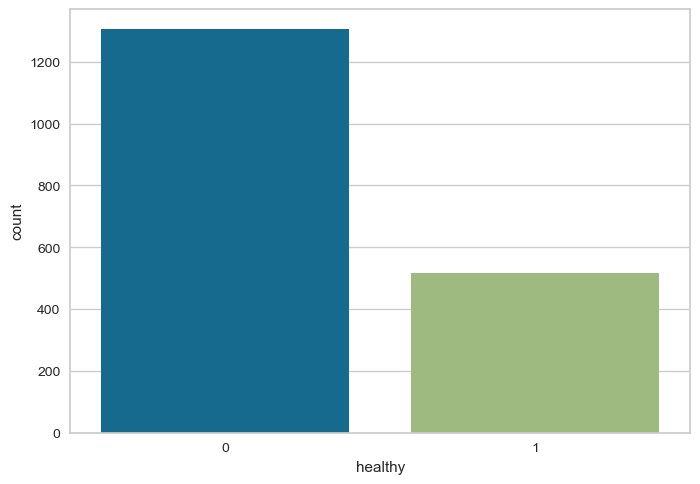

   multiple_diseases      Ratio
0               1730  95.002746
1                 91   4.997254
##########################################


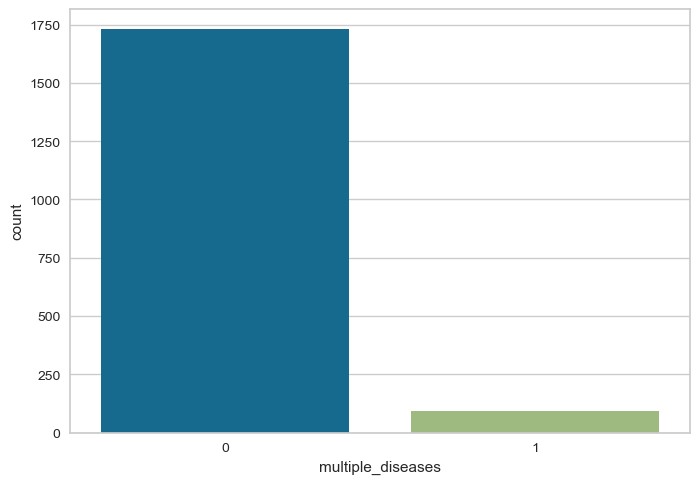

   rust      Ratio
0  1199  65.842943
1   622  34.157057
##########################################


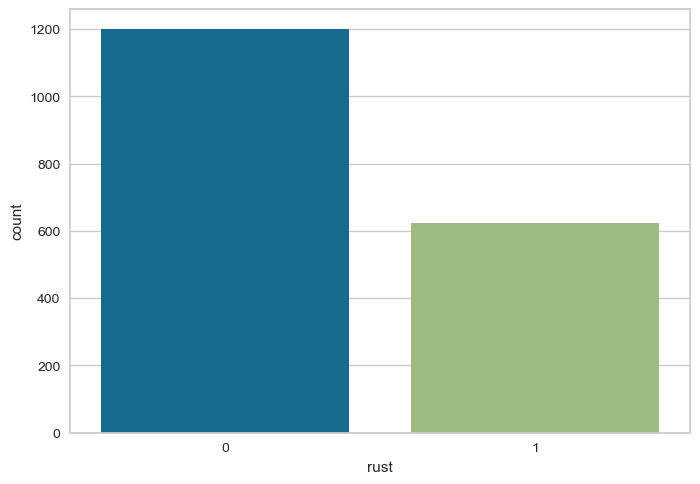

   scab     Ratio
0  1229  67.49039
1   592  32.50961
##########################################


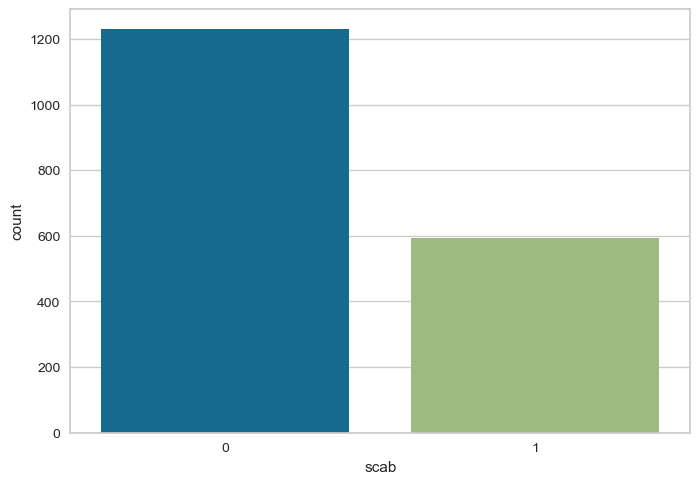

In [11]:
for col in cat_cols:
    cat_summary(df, col)

### 1.9. Examination of Numerical Variables

In [12]:
num_cols

[]

#### 1.9.1.Distribution of Numerical Variables

In [13]:
def num_summary(dataframe, numerical_col, plot=True):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

In [14]:
for col in num_cols:
    num_summary(df, col, plot=True)

There are no numeric variables in our dataset.

### 1.10 Target Variable Analysis

In [16]:
df["healthy"].value_counts()

0    1305
1     516
Name: healthy, dtype: int64

#### 10.1.1. Analysis of the Target Variable with Categorical Variables


In [17]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")


In [19]:
for col in cat_cols:
    target_summary_with_cat(df, "healthy", col)

         TARGET_MEAN
healthy             
0                0.0
1                1.0


                   TARGET_MEAN
multiple_diseases             
0                     0.298266
1                     0.000000


      TARGET_MEAN
rust             
0        0.430359
1        0.000000


      TARGET_MEAN
scab             
0        0.419854
1        0.000000





#### 10.1.2. The Analysis of Target Variable with Numerical Variables


In [66]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [67]:
for col in num_cols:
    target_summary_with_num(df, "saglikli", col)



### 1.11. Correlation Analysis

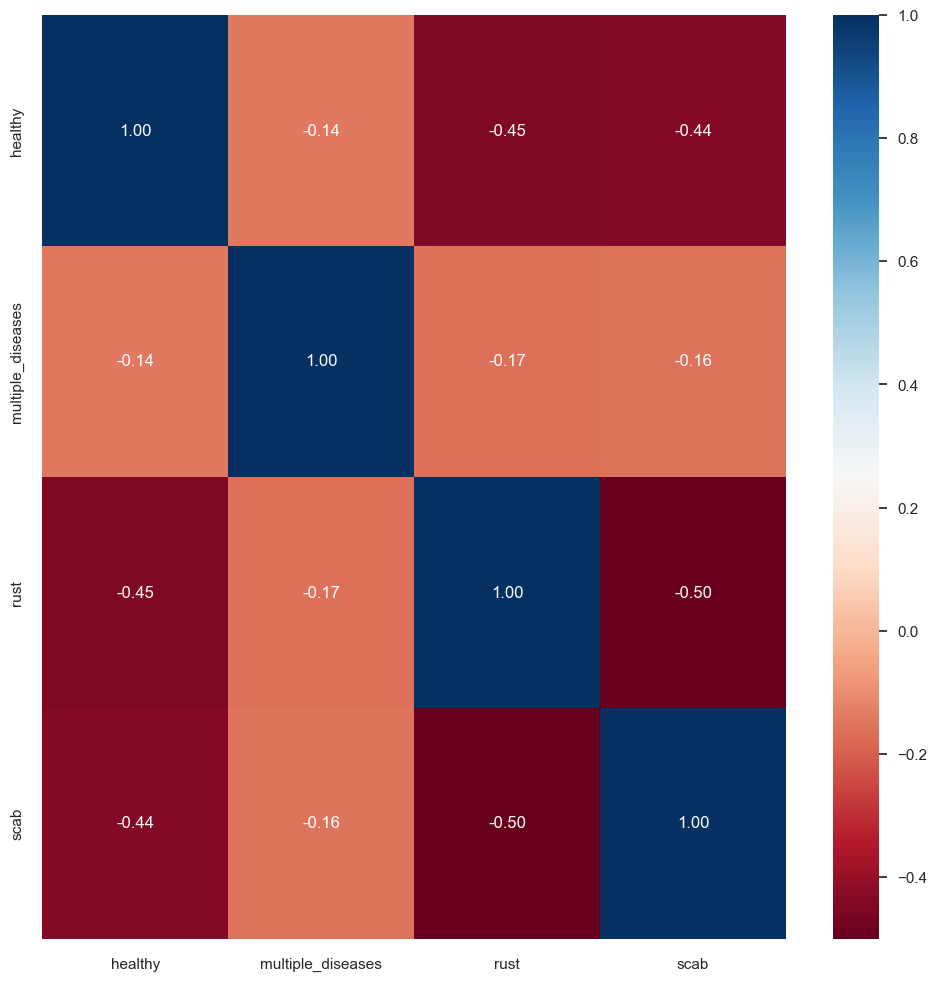

In [20]:
corr = df.corr()

sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu", annot=True, fmt=".2f")
plt.show()


####  1.11.1. Correlation Analysis Matrix Table

In [21]:
#korelasyon matrisi tablosu
cor_matrix = df.corr().abs()
cor_matrix

,healthy,multiple_diseases,rust,scab
healthy,1.000000,0.144217,0.452903,0.436420
multiple_diseases,0.144217,1.000000,0.165190,0.159178
rust,0.452903,0.165190,1.000000,0.499885
scab,0.436420,0.159178,0.499885,1.000000


#### 1.11.2. Correlation Analysis Matrix Table 2

In [22]:
upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
upper_triangle_matrix

,healthy,multiple_diseases,rust,scab
healthy,NaN,0.144217,0.452903,0.436420
multiple_diseases,NaN,NaN,0.165190,0.159178
rust,NaN,NaN,NaN,0.499885
scab,NaN,NaN,NaN,NaN


## Section 2

## 2. Feature Enginerring

### 2.1. Outlier Analysis

#### 2.1.1. Defining the IQR (Interquartile Range) Function for Boxplot Method

In [23]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

#### 2.1.2. Determining the Lower and Upper Limits of IQR

In [24]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


#### 2.1.3. Variables with Outliers

In [25]:
for col in num_cols:
    print(col, check_outlier(df, col))

There are no outliers because there are no continuous variables.

### 2.2. Missing Values

In [26]:
df.isnull().sum().sum()# eksik veri sayısı

0

There are no missing values."

### 2.3. Encoding

In [27]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe


# cat_cols, num_cols, cat_but_car = grab_col_names(df)

ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]


one_hot_encoder(df, ohe_cols).head()

df.head()

,healthy,multiple_diseases,rust,scab
image_id,,,,
Train_0,0,0,0,1
Train_1,0,1,0,0
Train_2,1,0,0,0
Train_3,0,0,1,0
Train_4,1,0,0,0


### 2.4. Özellik Ölçeklendirme(Scale)

In [29]:
y = df["healthy"]
X = df.drop(["healthy"], axis=1)

In [30]:
y.head()

image_id
Train_0    0
Train_1    0
Train_2    1
Train_3    0
Train_4    1
Name: healthy, dtype: int64

In [31]:
scaler= RobustScaler()
df[X.columns.to_list()]=scaler.fit_transform(df[X.columns.to_list()])

In [32]:
df.head()

,healthy,multiple_diseases,rust,scab
image_id,,,,
Train_0,0,0.0,0.0,1.0
Train_1,0,1.0,0.0,0.0
Train_2,1,0.0,0.0,0.0
Train_3,0,0.0,1.0,0.0
Train_4,1,0.0,0.0,0.0


## SECTİON 3

## 3. MODEL SETUP AND TRAINING

In [36]:
import joblib
import pandas as pd


### 3.1. Splitting into Training - Validation - Test datasets

In [37]:
from sklearn.model_selection import train_test_split

# Veri setini train ve test setlerine ayırma
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=17)

# Kalan veri setini validation ve test setlerine ayırma
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=17)

### 3.2. Setting up Base Models

In [38]:
def base_models(X, y, scoring="roc_auc"):
    print("Base Models....")
    classifiers = [('LR', LogisticRegression()),
                   ('KNN', KNeighborsClassifier()),
                   ("SVC", SVC()),
                   ("CART", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier()),
                   ('Adaboost', AdaBoostClassifier()),
                   ('GBM', GradientBoostingClassifier()),
                   ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
                   ('LightGBM', LGBMClassifier()),
                   # ('CatBoost', CatBoostClassifier(verbose=False))
                   ]

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=3, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

base_models(X_test, y_test, scoring="accuracy")

Base Models....
accuracy: 1.0 (LR) 
accuracy: 1.0 (KNN) 
accuracy: 1.0 (SVC) 
accuracy: 1.0 (CART) 


C:\Users\pc\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


accuracy: 1.0 (RF) 
accuracy: 1.0 (Adaboost) 
accuracy: 1.0 (GBM) 


C:\Users\pc\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\pc\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\pc\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


accuracy: 1.0 (XGBoost) 
accuracy: 0.9235 (LightGBM) 


### 3.3. Hyperparameter Optimization

In [39]:
######################################################
# 4. Automated Hyperparameter Optimization
######################################################

knn_params = {"n_neighbors": range(2, 50)}

cart_params = {'max_depth': range(1, 20),
               "min_samples_split": range(2, 30)}

rf_params = {"max_depth": [8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [15, 20],
             "n_estimators": [200, 300]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 200]}

lightgbm_params = {"learning_rate": [0.01, 0.1],
                   "n_estimators": [300, 500]}


classifiers = [('KNN', KNeighborsClassifier(), knn_params),
               ("CART", DecisionTreeClassifier(), cart_params),
               ("RF", RandomForestClassifier(), rf_params),
               ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgboost_params),
               ('LightGBM', LGBMClassifier(), lightgbm_params)]



C:\Users\pc\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [40]:
def hyperparameter_optimization(X, y, cv=3, scoring="roc_auc"):
    print("Hyperparameter Optimization....")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} ##########")
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models



In [41]:
best_models = hyperparameter_optimization(X_train, y_train)

Hyperparameter Optimization....
########## KNN ##########
roc_auc (Before): 1.0
roc_auc (After): 1.0
KNN best params: {'n_neighbors': 2}

########## CART ##########
roc_auc (Before): 1.0
roc_auc (After): 1.0
CART best params: {'max_depth': 3, 'min_samples_split': 2}

########## RF ##########
roc_auc (Before): 1.0


C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
72 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\pc\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\pc\anaconda3\lib\site-packages\joblib\parallel.

roc_auc (After): 1.0
RF best params: {'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 15, 'n_estimators': 200}

########## XGBoost ##########
roc_auc (Before): 1.0


C:\Users\pc\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\pc\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\pc\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\pc\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\pc\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\pc\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarnin

roc_auc (After): 1.0
XGBoost best params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

########## LightGBM ##########
roc_auc (Before): 1.0
roc_auc (After): 1.0
LightGBM best params: {'learning_rate': 0.01, 'n_estimators': 300}



### 3.4. Ensemble Model Created from the Best Models

In [42]:
######################################################
# 5. Stacking & Ensemble Learning
######################################################

def voting_classifier(best_models, X, y):
    print("Voting Classifier...")

    voting_clf = VotingClassifier(estimators=[('KNN', best_models["KNN"]),
                                              ('RF', best_models["RF"]),
                                              ('LightGBM', best_models["LightGBM"])],
                                  voting='soft').fit(X, y)

    cv_results = cross_validate(voting_clf, X, y, cv=3, scoring=["accuracy", "f1", "roc_auc"])
    print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
    print(f"F1Score: {cv_results['test_f1'].mean()}")
    print(f"ROC_AUC: {cv_results['test_roc_auc'].mean()}")
    return voting_clf



In [43]:
voting_clf = voting_classifier(best_models, X_train, y_train)

Voting Classifier...
Accuracy: 1.0
F1Score: 1.0
ROC_AUC: 1.0


### 3.5. Error Rate in the Most Successful Model

In [44]:
train_pred=voting_clf.predict(X_train)
val_pred=voting_clf.predict(X_validation)
test_pred=voting_clf.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score

def calculate_accuracy_for_custom_splits(y_true_train, y_pred_train, y_true_val, y_pred_val, y_true_test, y_pred_test):
    """
    Verilen gerçek ve tahmin edilen değerler için doğruluk hesaplar.

    Parameters:
    - y_true_train: Eğitim setindeki gerçek değerler
    - y_pred_train: Eğitim setindeki tahmin edilen değerler
    - y_true_val: Doğrulama setindeki gerçek değerler
    - y_pred_val: Doğrulama setindeki tahmin edilen değerler
    - y_true_test: Test setindeki gerçek değerler
    - y_pred_test: Test setindeki tahmin edilen değerler

    Returns:
    - train_accuracy: Eğitim seti doğruluğu
    - val_accuracy: Doğrulama seti doğruluğu
    - test_accuracy: Test seti doğruluğu
    """

    # Eğitim setinde doğruluk hesapla
    train_accuracy = accuracy_score(y_true_train, y_pred_train)

    # Doğrulama setinde doğruluk hesapla
    val_accuracy = accuracy_score(y_true_val, y_pred_val)

    # Test setinde doğruluk hesapla
    test_accuracy = accuracy_score(y_true_test, y_pred_test)

    print(f"Train Accuracy: {train_accuracy}")
    print(f"Validation Accuracy: {val_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")

    return train_accuracy, val_accuracy, test_accuracy

In [46]:
calculate_accuracy_for_custom_splits(y_train, train_pred,y_validation, val_pred, y_test, test_pred)

Train Accuracy: 1.0
Validation Accuracy: 1.0
Test Accuracy: 1.0


(1.0, 1.0, 1.0)

### 3.6. Model Logging

In [47]:
joblib.dump(voting_clf, "voting_clf2.pkl")

['voting_clf2.pkl']

### 3.7. Model Invocation

In [48]:
random_user = X.sample(1, random_state=45)
new_model = joblib.load("voting_clf2.pkl")
new_model.predict(random_user)

array([0], dtype=int64)